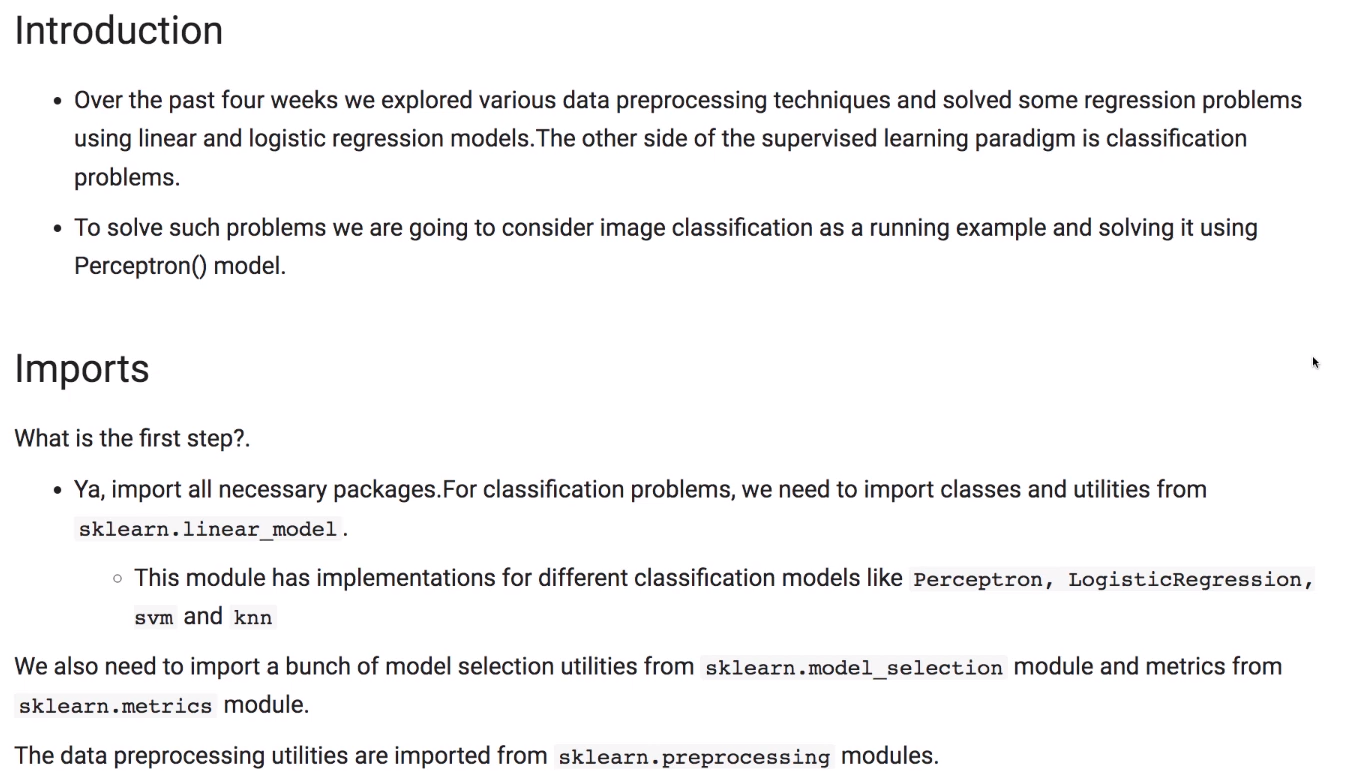

In [3]:
# Common imports
import numpy as np
import os, io, warnings

# sklearn imports
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import hinge_loss
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV

from pprint import pprint

# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

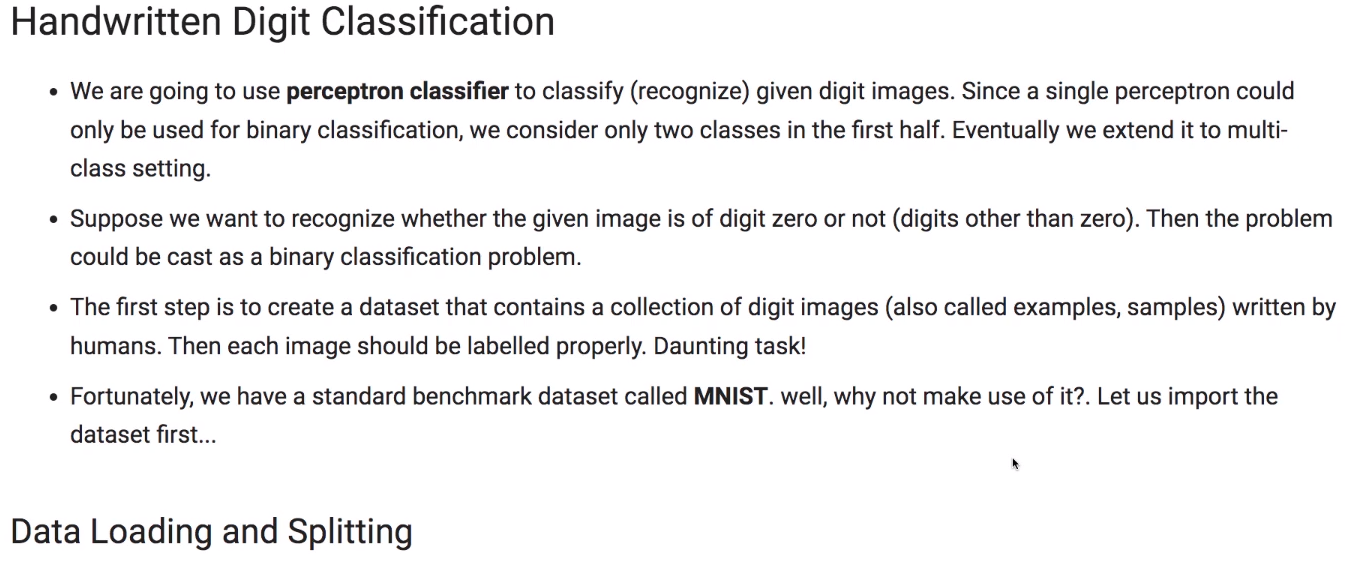

In [4]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

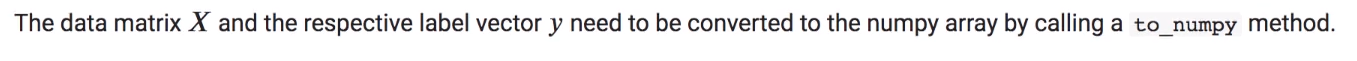

In [5]:
X = X.to_numpy()
y = y.to_numpy()

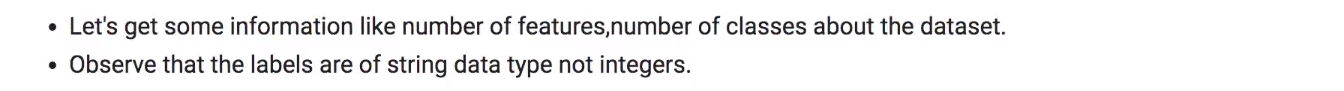

In [6]:
target_names = np.unique(y)
print('Number of samples: {0}, type:{1}'.format(X.shape[0], X.dtype))
print('Number of features: {0}'.format(X.shape[1]))
print('Minimum: {0}, Maximum:{1}'.format(np.min(X), np.max(X)))
print('Number of classes: {0}, type:{1}'.format(len(target_names), y.dtype))
print('Labels: {0}'.format(target_names))

Number of samples: 70000, type:float64
Number of features: 784
Minimum: 0.0, Maximum:255.0
Number of classes: 10, type:object
Labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


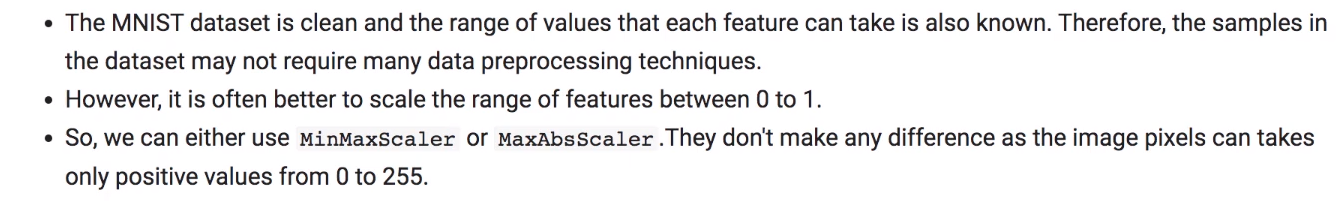

In [7]:
X = MinMaxScaler().fit_transform(X)
print('Minimum:{0}, Maximum:{1}'.format(np.min(X), np.max(X)))

Minimum:0.0, Maximum:1.0


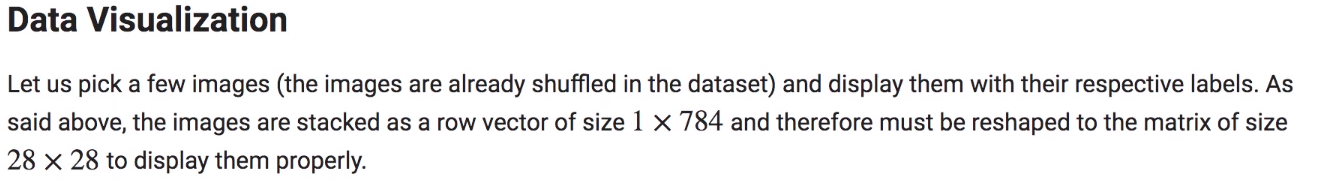

C:\Program Files\KMSpico\temp\ipykernel_25092\203665229.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  factor = np.int(np.sqrt(num_images))


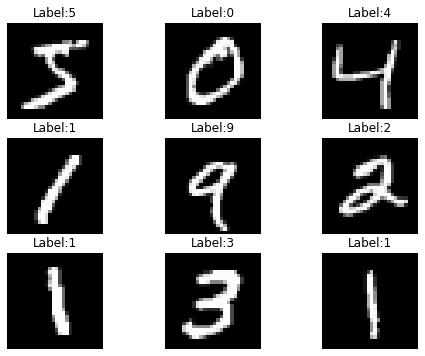

In [8]:
num_images = 9 # Choose a square number
factor = np.int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8, 6))
idx_offset = 0 # take "num_images" starting from the index "idx_offset"

for i in range(factor):
    index = idx_offset + i*factor
    for j in range(factor):
        ax[i, j].imshow(X[index+j].reshape(28,28), cmap='gray')
        ax[i, j].set_title('Label:{0}'.format(str(y[index+j])))
        ax[i, j].set_axis_off()

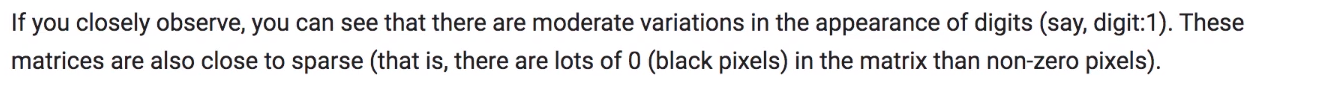
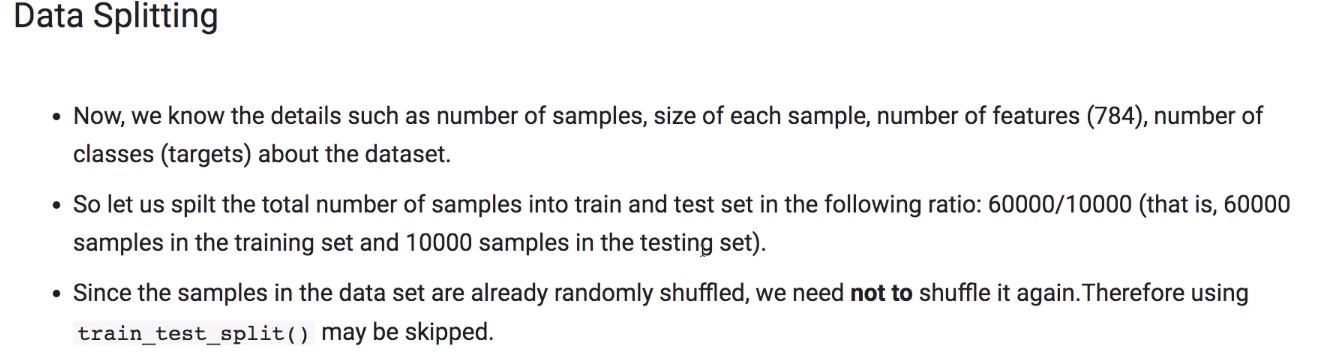

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

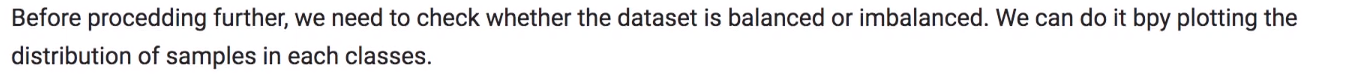

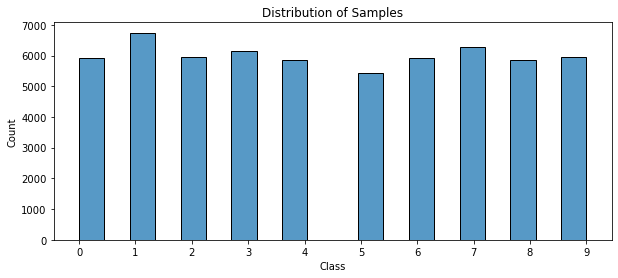

In [10]:
plt.figure(figsize=(10,4))
sns.histplot(data=np.int8(y_train), binwidth=0.45, bins=11)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xlabel('Class')
plt.title('Distribution of Samples')
plt.show()

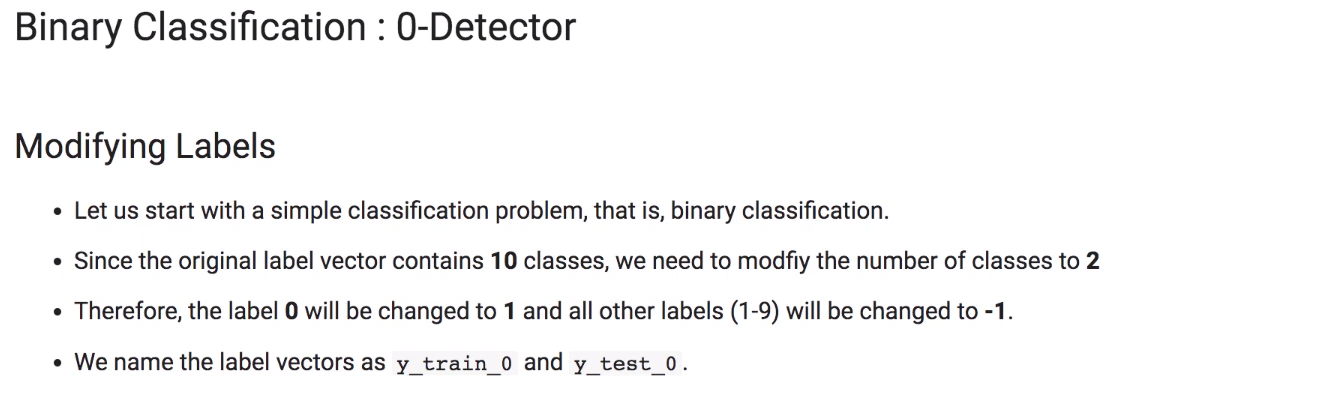

In [11]:
# initilize new variable names with all -1
y_train_0 = -1*np.ones((len(y_train)))
y_test_0 = -1*np.ones((len(y_test)))

# find indices with digit 0 image
indx_0 = np.where(y_train == '0')  # remeber original labels are of type str not int
# use those indices to modify y_train_0 and y_test_0
y_train_0[indx_0] = 1
indx_0 = np.where(y_test == '0')
y_test_0[indx_0] = 1

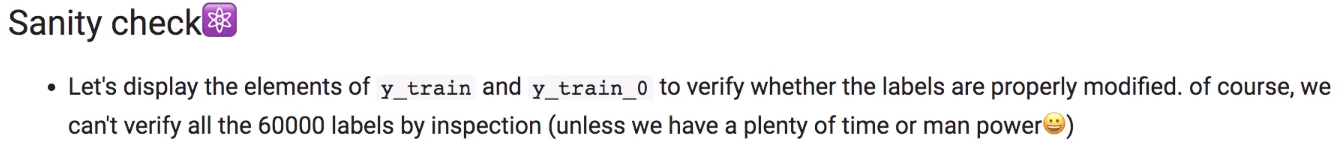

C:\Program Files\KMSpico\temp\ipykernel_25092\2535955486.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  factor = np.int(np.sqrt(num_images))


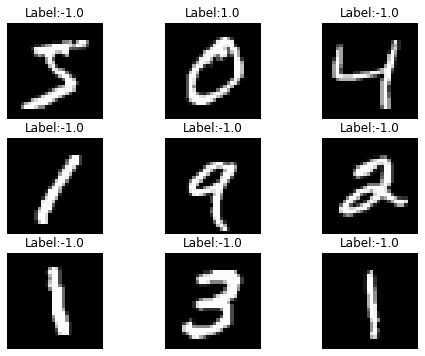

In [12]:
num_images = 9 # Choose a square number
factor = np.int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8, 6))
idx_offset = 0 # take "num_images" starting from the index "idx_offset"

for i in range(factor):
    index = idx_offset + i*factor
    for j in range(factor):
        ax[i, j].imshow(X[index+j].reshape(28,28), cmap='gray')
        ax[i, j].set_title('Label:{0}'.format(str(y_train_0[index+j])))
        ax[i, j].set_axis_off()

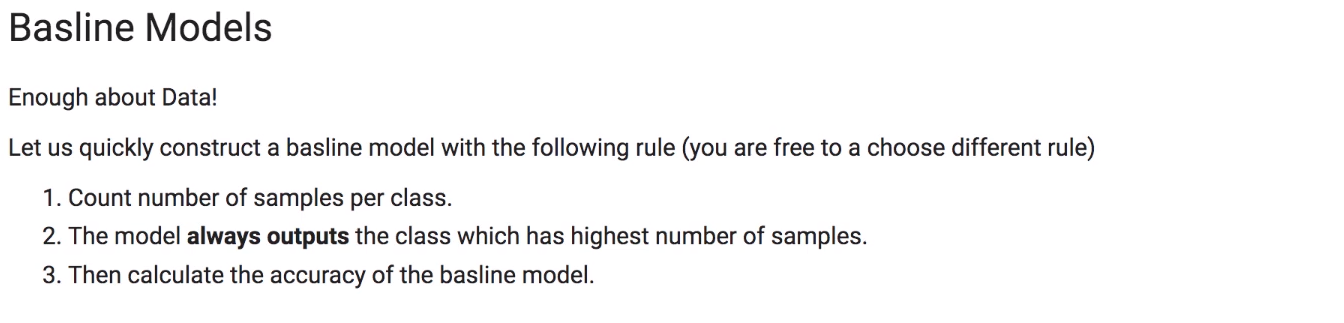

In [41]:
num_pos = len(np.where(y_train_0 == 1)[0])
num_neg = len(np.where(y_train_0 == -1)[0])
print(num_pos, num_neg)

5923 54077


In [42]:
base_clf = DummyClassifier(strategy='most_frequent')  # there are other strategies

In [43]:
base_clf.fit(X_train, y_train_0)
print('Training accuracy: {0:0.2f}'.format(base_clf.score(X_train, y_train_0)))
print('Testing accuracy: {0:0.2f}'.format(base_clf.score(X_test, y_test_0)))

Training accuracy: 0.90
Testing accuracy: 0.90


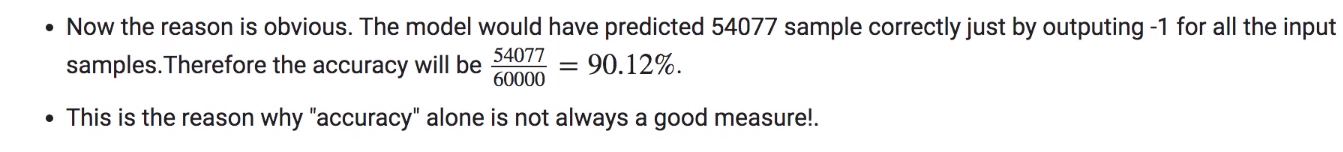
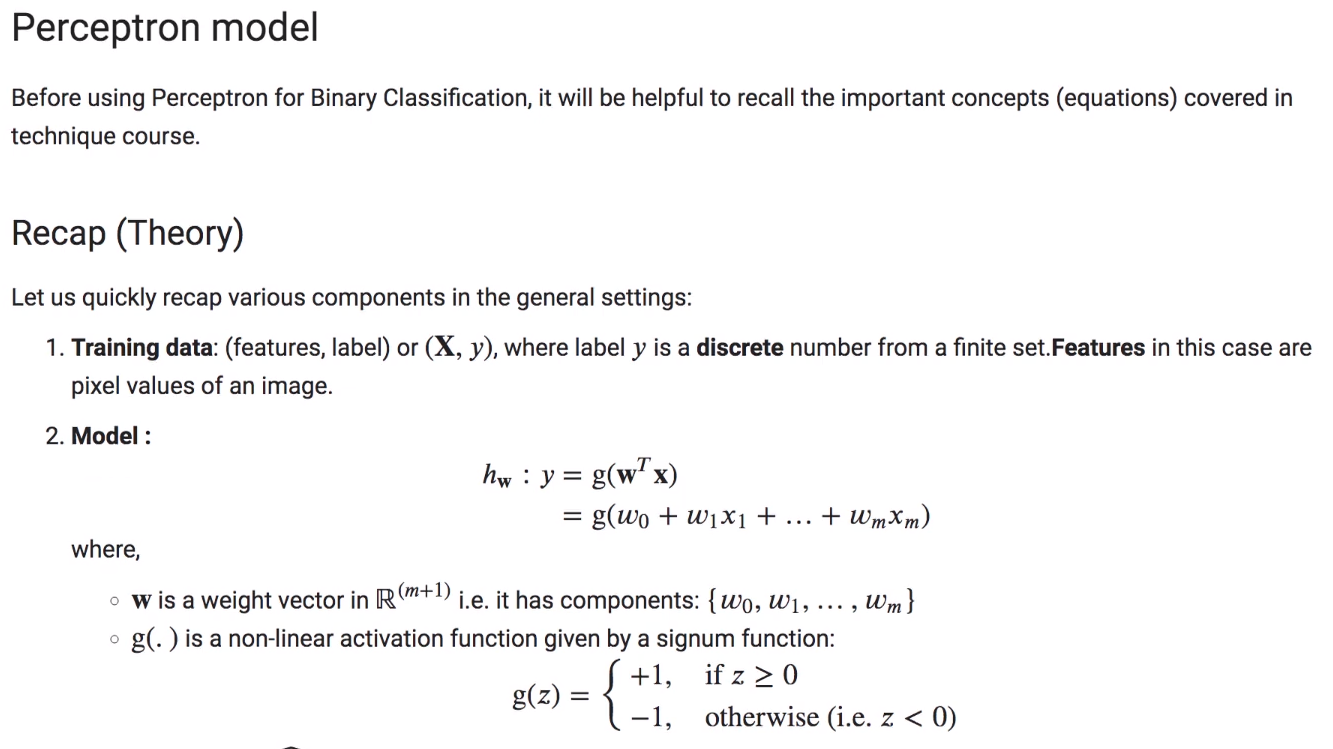
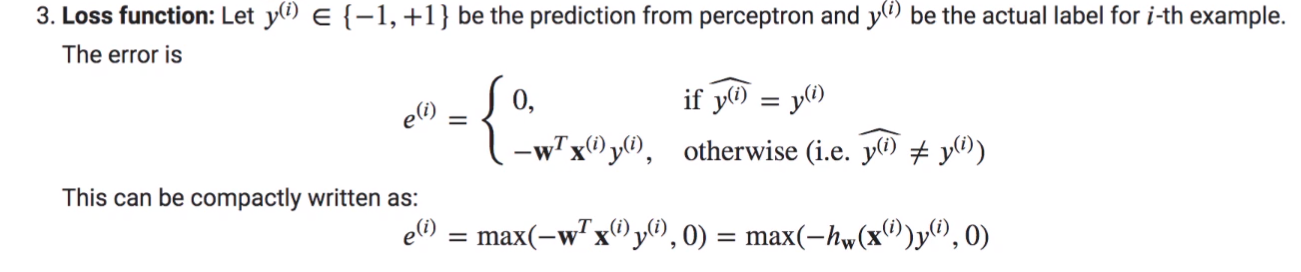
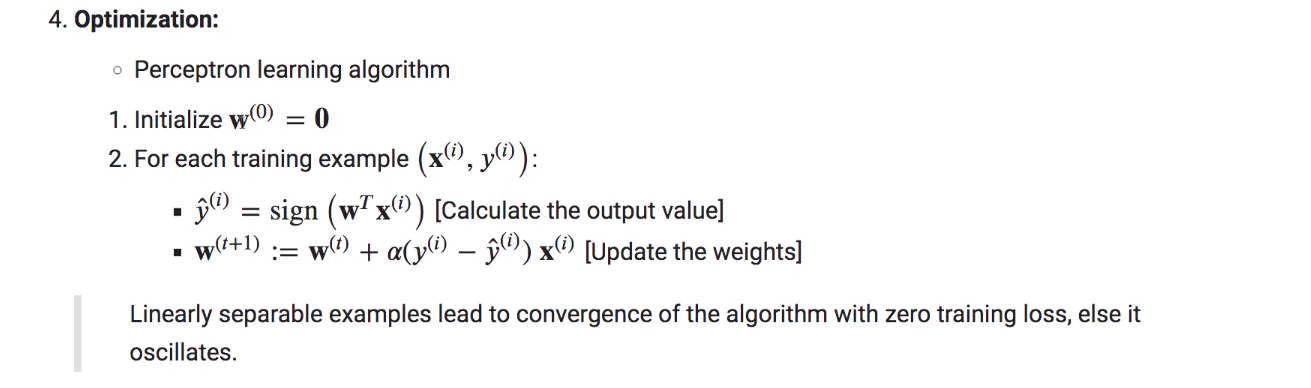
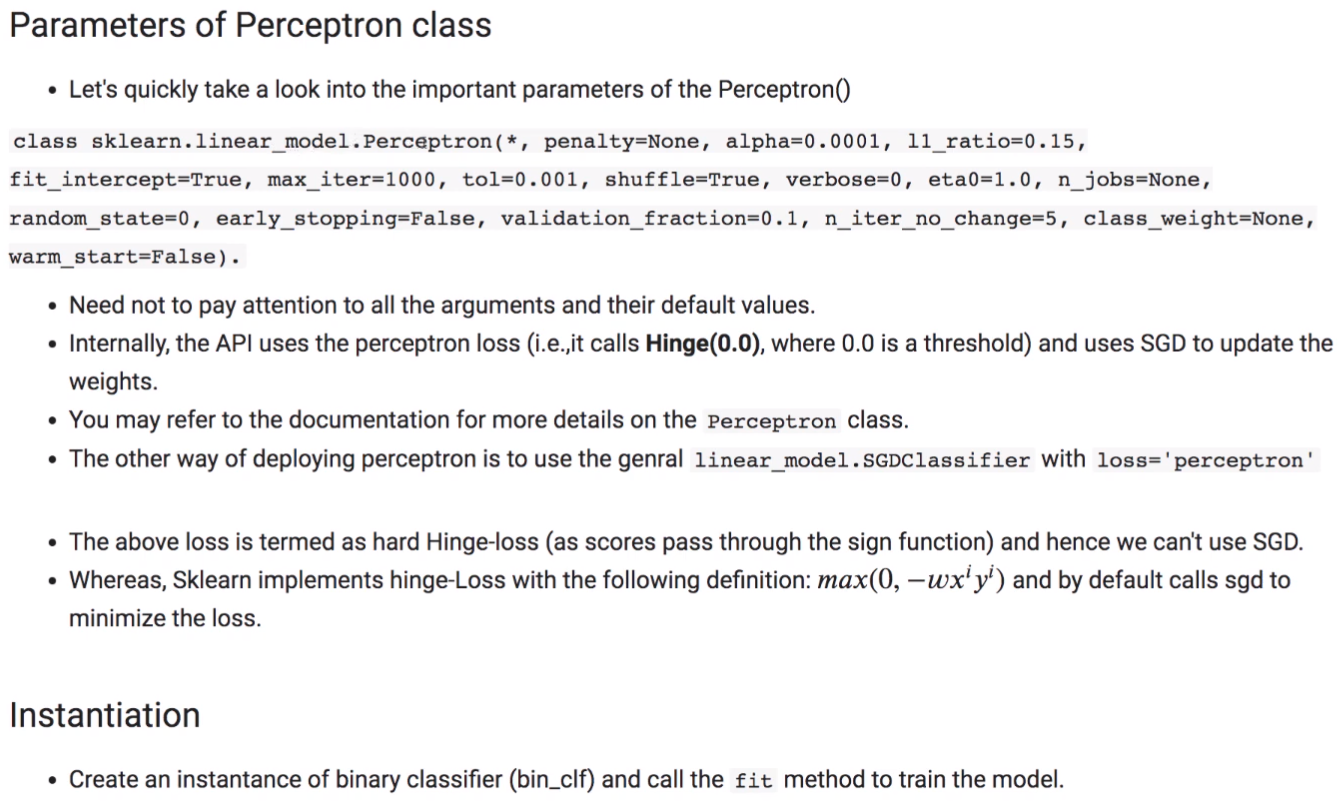

In [45]:
bin_clf = Perceptron(max_iter=100, random_state=1729)

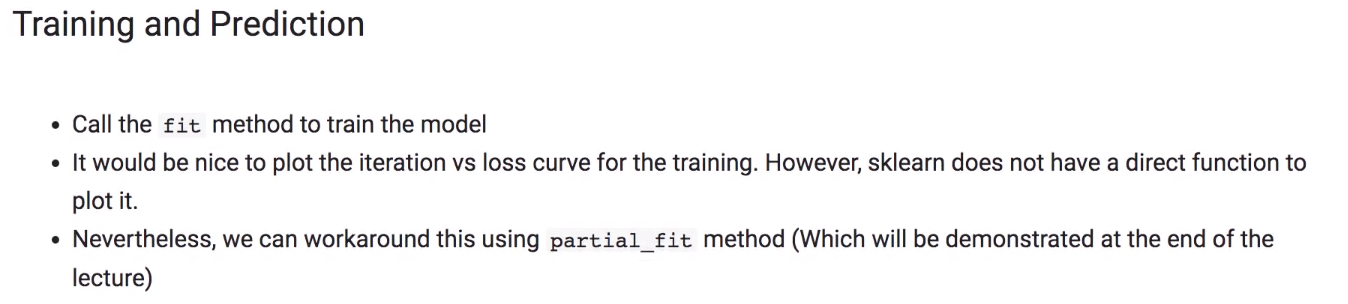

In [46]:
bin_clf.fit(X_train, y_train_0)
print('Dimension of Weights w: {0}'.format(bin_clf.coef_.shape))
print('Bias: {0}'.format(bin_clf.intercept_))
print('The loss function: {0}'.format(bin_clf.loss_function_))

Dimension of Weights w: (1, 784)
Bias: [-108.]
The loss function: <sklearn.linear_model._sgd_fast.Hinge object at 0x00000207A19FAA90>


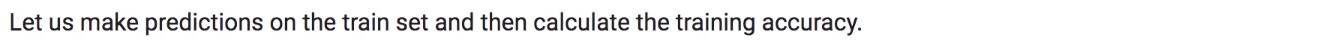

In [47]:
y_hat_train_0 = bin_clf.predict(X_train)
print('Training Accuracy: ', bin_clf.score(X_train, y_train_0))

Training Acuracy:  0.99095


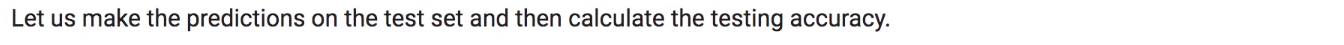

In [48]:
print('Testing Accuracy: ', bin_clf.score(X_test, y_test_0))

Testing Accuracy:  0.989


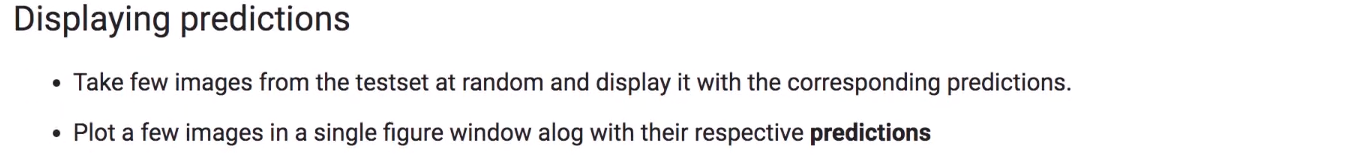

C:\Program Files\KMSpico\temp\ipykernel_21764\3410971533.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  factor = np.int(np.sqrt(num_images))


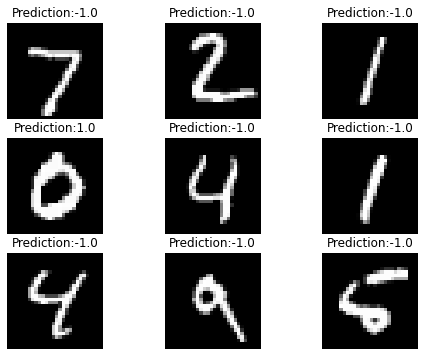

In [50]:
y_hat_test_0 = bin_clf.predict(X_test)

num_images = 9 # Choose a square number
factor = np.int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8, 6))
idx_offset = 0 # take "num_images" starting from the index "idx_offset"

for i in range(factor):
    index = idx_offset + i*factor
    for j in range(factor):
        ax[i, j].imshow(X_test[index+j].reshape(28,28), cmap='gray')
        ax[i, j].set_title('Prediction:{0}'.format(str(y_hat_test_0[index+j])))
        ax[i, j].set_axis_off()

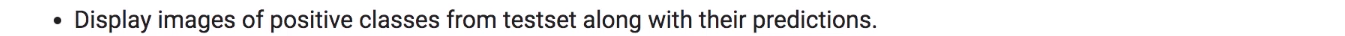

C:\Program Files\KMSpico\temp\ipykernel_21764\2556449473.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  factor = np.int(np.sqrt(num_images))


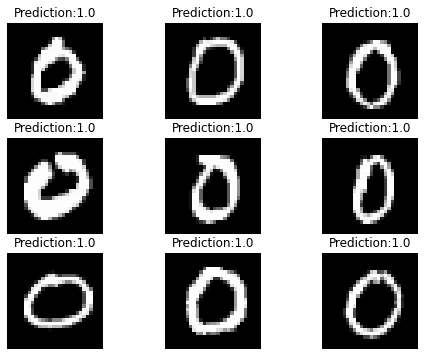

In [51]:
indx_0 = np.where(y_test_0 == 1)

zeroImgs = X_test[indx_0[0]]
zeroLabls = y_hat_test_0[indx_0[0]]

num_images = 9 # Choose a square number
factor = np.int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8, 6))
idx_offset = 0 # take "num_images" starting from the index "idx_offset"

for i in range(factor):
    index = idx_offset + i*factor
    for j in range(factor):
        ax[i, j].imshow(zeroImgs[index+j].reshape(28,28), cmap='gray')
        ax[i, j].set_title('Prediction:{0}'.format(str(zeroLabls[index+j])))
        ax[i, j].set_axis_off()

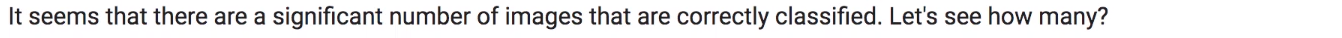

In [52]:
num_misclassified = np.count_nonzero(zeroLabls == -1)
num_correctpred = len(zeroLabls) - num_misclassified
accuracy = num_correctpred/len(zeroLabls)
print(accuracy)

0.9193877551020408


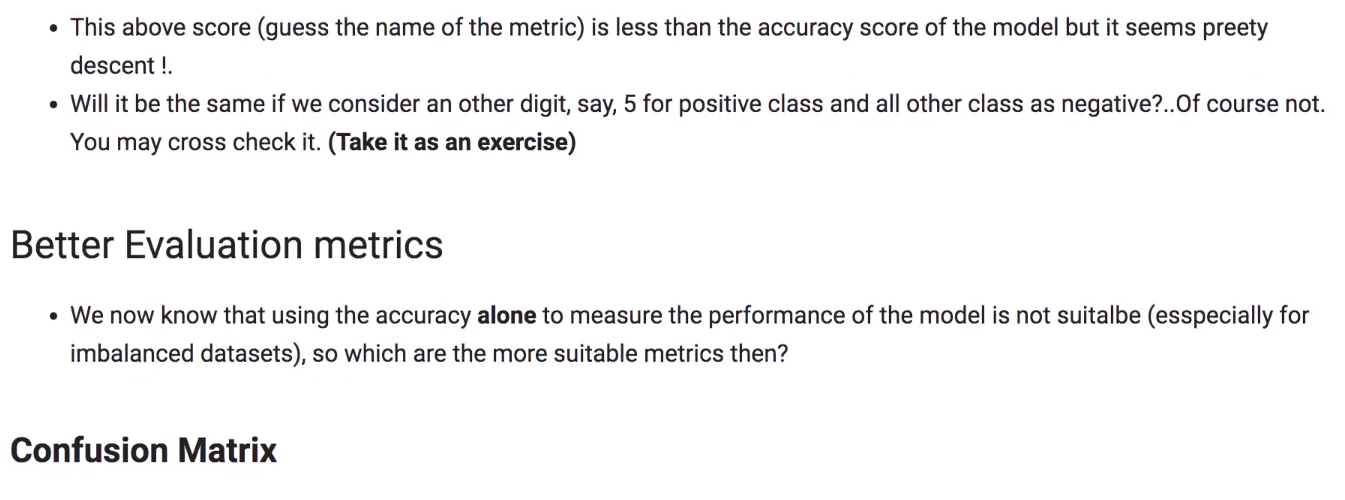

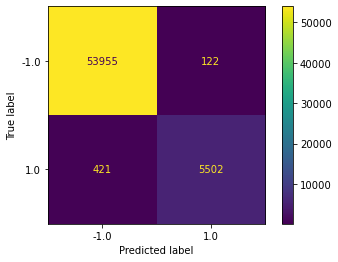

In [55]:
y_hat_train_0 = bin_clf.predict(X_train)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train_0, y_hat_train_0, values_format='.5g')

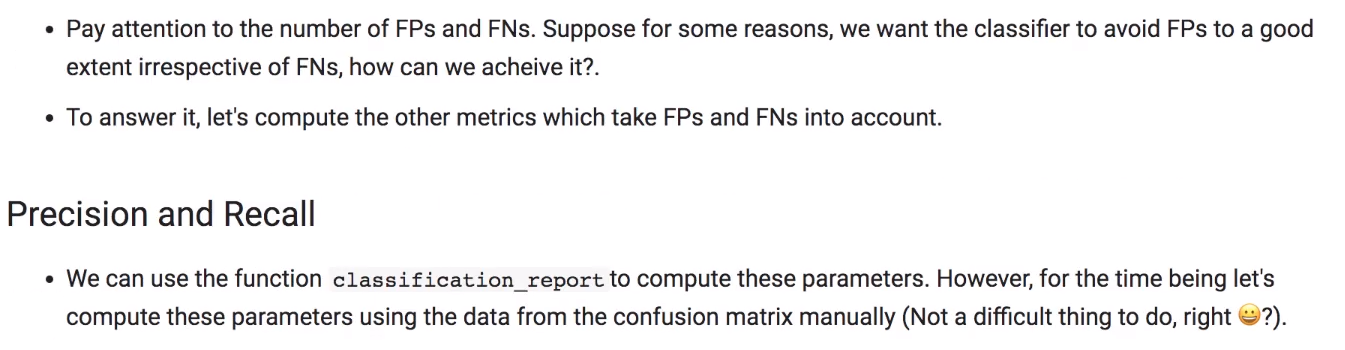

In [56]:
cf_matrix = cm_display.confusion_matrix
tn = cf_matrix[0, 0]
fn = cf_matrix[1, 0]
fp = cf_matrix[0, 1]
tp = cf_matrix[1, 1]

In [57]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
accuracy = (tp+tn)/(tp+tn+fp+fn)

print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)

Precision: 0.9783072546230441
Recall: 0.9289211548201924
Accuracy: 0.99095


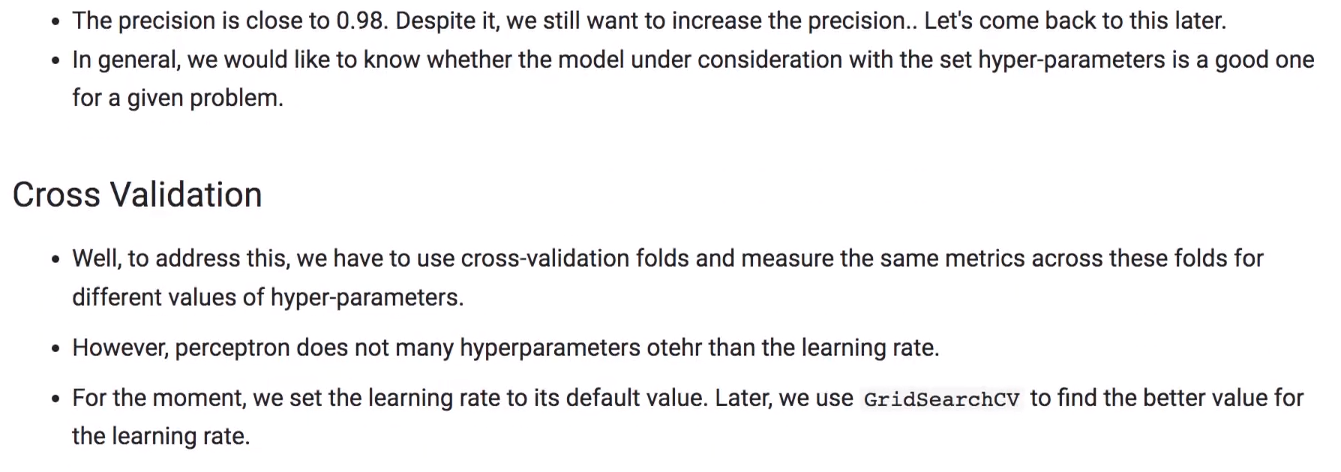

In [58]:
bin_clf = Perceptron(max_iter=100, random_state=1729)
scores = cross_validate(bin_clf, X_train, y_train_0, cv=5,
                        scoring=['precision', 'recall', 'f1'],
                        return_estimator=True)
pprint(scores)

{'estimator': [Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729)],
 'fit_time': array([0.94901204, 1.91101265, 1.40603423, 1.22299695, 1.54303074]),
 'score_time': array([0.03395319, 0.03598237, 0.03196192, 0.03199863, 0.03296447]),
 'test_f1': array([0.95238095, 0.91666667, 0.94915254, 0.94117647, 0.95091763]),
 'test_precision': array([0.95890411, 0.98828125, 0.95319149, 0.95090439, 0.96200345]),
 'test_recall': array([0.94594595, 0.85472973, 0.94514768, 0.93164557, 0.94008439])}


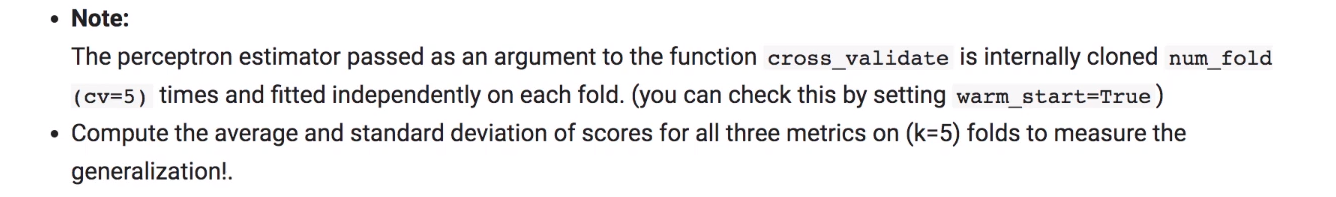

In [60]:
print('f1,         avg:{0:0.2f}, std:{1:0.3f}'.format(scores['test_f1'].mean(), scores['test_f1'].std()))
print('precision,  avg:{0:0.2f}, std:{1:0.3f}'.format(scores['test_precision'].mean(), scores['test_precision'].std()))
print('recall,     avg:{0:0.2f}, std:{1:0.3f}'.format(scores['test_recall'].mean(), scores['test_recall'].std()))

f1,         avg:0.94, std:0.013
precision,  avg:0.96, std:0.013
recall,     avg:0.92, std:0.035


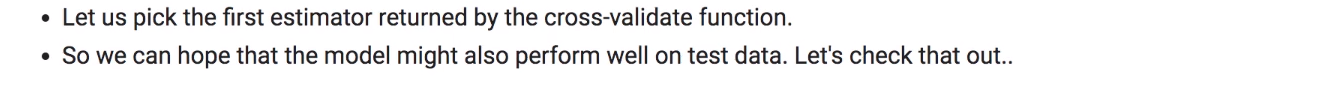

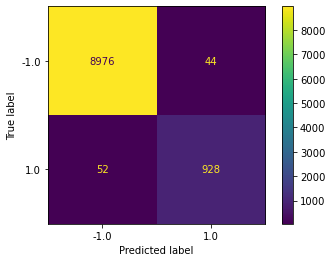

In [61]:
bin_clf = scores['estimator'][0]

y_hat_test_0 = bin_clf.predict(X_test)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test_0, y_hat_test_0, values_format='.5g')

In [62]:
print('Precision %.2f'%precision_score(y_test_0, y_hat_test_0))
print('Recall %.2f'%recall_score(y_test_0, y_hat_test_0))

Precision 0.95
Recall 0.95


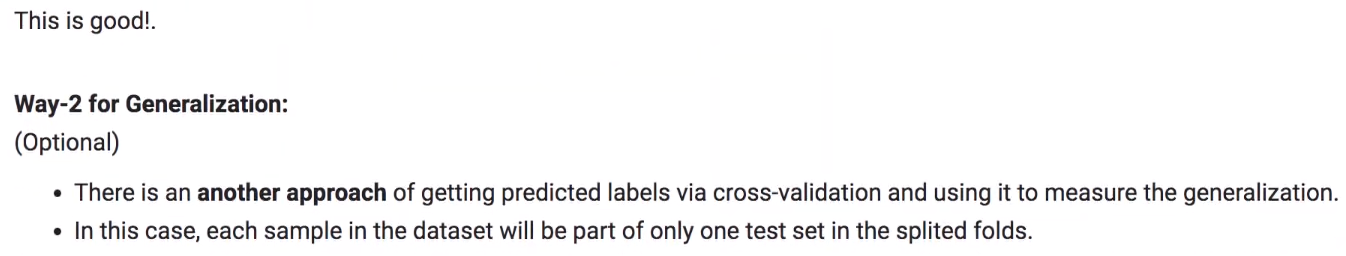

In [63]:
y_hat_train_0 = cross_val_predict(bin_clf, X_train, y_train_0, cv=5)

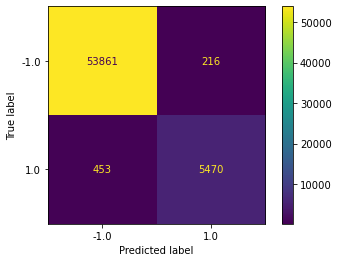

In [64]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train_0, y_hat_train_0, values_format='.5g')

In [65]:
cf_matrix = cm_display.confusion_matrix
tn = cf_matrix[0, 0]
fn = cf_matrix[1, 0]
fp = cf_matrix[0, 1]
tp = cf_matrix[1, 1]

In [66]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
accuracy = (tp+tn)/(tp+tn+fp+fn)
f1 = 2*precision*recall/(precision+recall)

print('Precision:', precision)
print('Recall:', recall)
print('f1:', f1)
print('Accuracy:', accuracy)

Precision: 0.9620119591980303
Recall: 0.9235184872530812
f1: 0.9423722973555001
Accuracy: 0.98885


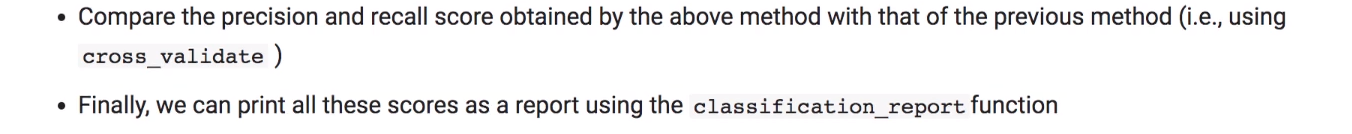

In [67]:
print('Precision %.2f'%precision_score(y_train_0, y_hat_train_0))
print('Recall %.2f'%recall_score(y_train_0, y_hat_train_0))
print('-'*50)
print(classification_report(y_train_0, y_hat_train_0))

Precision 0.96
Recall 0.92
--------------------------------------------------
              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99     54077
         1.0       0.96      0.92      0.94      5923

    accuracy                           0.99     60000
   macro avg       0.98      0.96      0.97     60000
weighted avg       0.99      0.99      0.99     60000



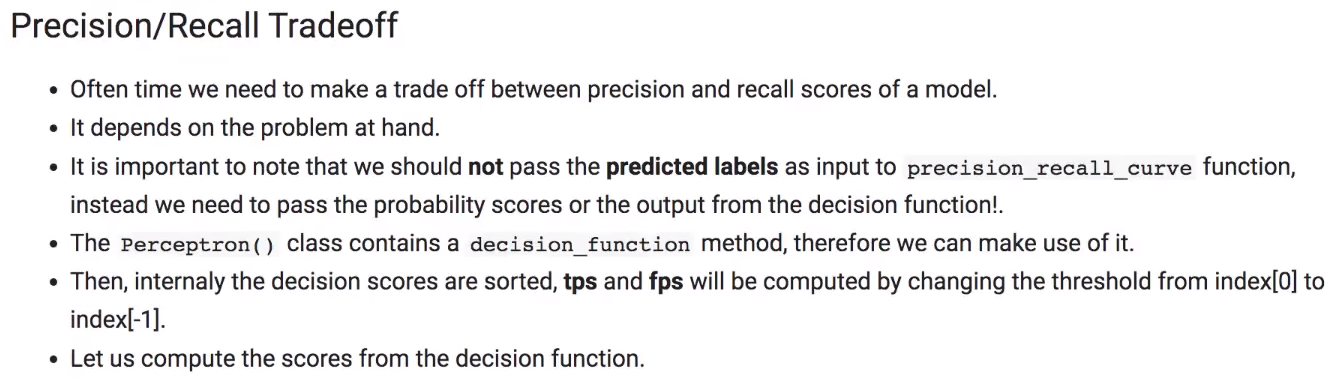

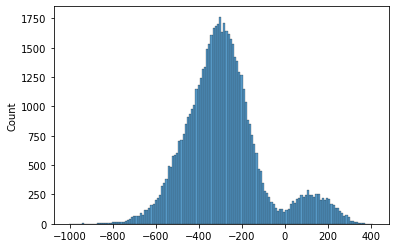

In [68]:
bin_clf = Perceptron(random_state=1729)
bin_clf.fit(X_train, y_train_0)
y_scores = bin_clf.decision_function(X_train)
sns.histplot(np.sort(y_scores))
plt.show()

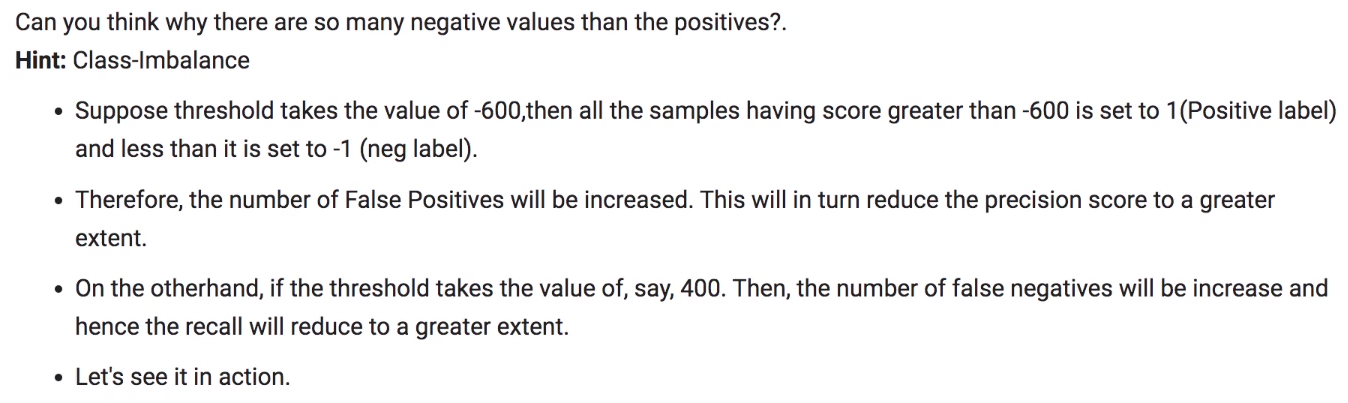

In [69]:
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores, pos_label=1)

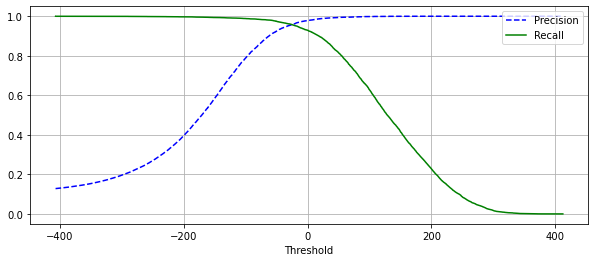

In [70]:
plt.figure(figsize=(10, 4))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [72]:
# get the index of threshold around zero
idx_th = np.where(np.logical_and(thresholds>0, thresholds<1))
print('precision for zero threshold:', precisions[idx_th[0][0]])

precision for zero threshold: 0.9783072546230441


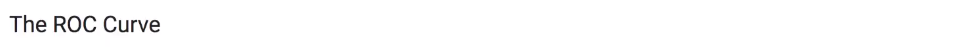

In [73]:
from sklearn.metrics import roc_curve

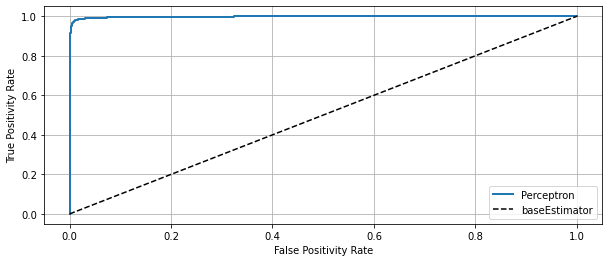

In [74]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)
plt.figure(figsize=(10,4))
plt.plot(fpr, tpr, linewidth=2, label='Perceptron')
plt.plot([0,1], [0,1], 'k--', label='baseEstimator')
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.grid(True)
plt.legend()
plt.show()

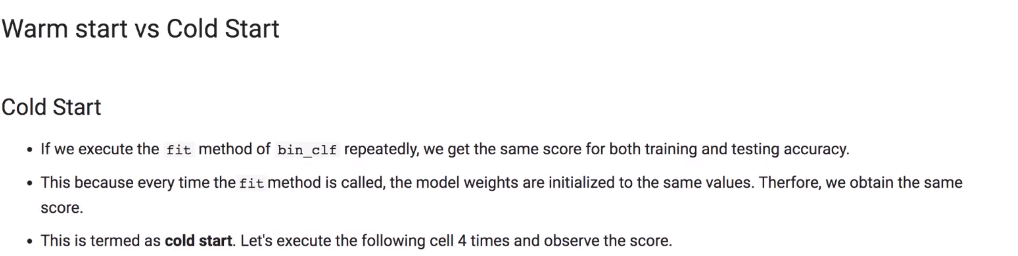

In [75]:
bin_clf.fit(X_train, y_train_0)
y_hat_train_0 = bin_clf.predict(X_train)
print('Training Accuracy:', bin_clf.score(X_train, y_train_0))
print('Test Accuracy:', bin_clf.score(X_test, y_test_0))

Training Accuracy: 0.99095
Test Accuracy: 0.989


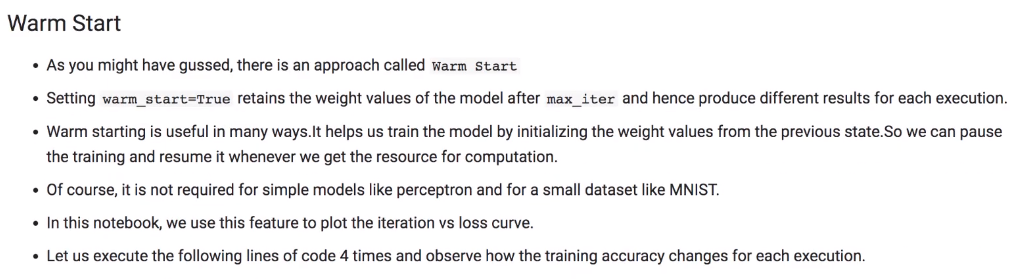

In [76]:
bin_clf_warm = Perceptron(max_iter=100, random_state=1729, warm_start=True)

bin_clf_warm.fit(X_train, y_train_0)
print('Training Accuracy:', bin_clf_warm.score(X_train, y_train_0))

Training Accuracy: 0.99095
